In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-price-prediction-dataset/used_cars.csv


In [91]:
train_file_path = "/kaggle/input/used-car-price-prediction-dataset/used_cars.csv"

df = pd.read_csv(train_file_path)

In [56]:
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [103]:
df.groupby('fuel_type')['fuel_type'].sum()

fuel_type
Diesel            DieselDieselDieselDieselDieselDieselDieselDies...
E85 Flex Fuel     E85 Flex FuelE85 Flex FuelE85 Flex FuelE85 Fle...
Gasoline          GasolineGasolineGasolineGasolineGasolineGasoli...
Hybrid            HybridHybridHybridHybridHybridHybridHybridHybr...
Plug-In Hybrid    Plug-In HybridPlug-In HybridPlug-In HybridPlug...
not supported                            not supportednot supported
–                     –––––––––––––––––––––––––––––––––––––––––––––
Name: fuel_type, dtype: object

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


missing values in fuel_type, accident, and clean_title.

In [90]:
df.clean_title.unique()

AttributeError: 'DataFrame' object has no attribute 'clean_title'

In [40]:
df.nunique()

brand             57
model           1898
model_year        34
milage          2818
fuel_type          7
engine          1146
transmission      62
ext_col          319
int_col          156
accident           2
clean_title        1
price           1569
dtype: int64

* brand: one-hot encode
* model: remove
* model_year: Keep unchanged
* milage: convert to integer
* fuel_type: one-hot encode and nothing for null
* engine: remove for now
* transmission: remove for now
* ext_col: remove for now
* int_col: remove for now
* accident: one-hot encode and nothing for null
* clean_title: one-hot encode and nothing for null

* price: convert to integer. Maybe check that everything is in dollars?



In [67]:
pd.get_dummies(df.brand, dtype=int).sum()

AttributeError: 'DataFrame' object has no attribute 'brand'

In [66]:
# One hot encode variables
columns_to_encode = ['brand', 'fuel_type', 'accident', 'clean_title']
for col in columns_to_encode:
    dummies = pd.get_dummies(df[col], dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)

In [83]:
# variable to drop
columns_to_drop = ['model', 'engine', 'transmission', 'ext_col', 'int_col']
df.drop(columns=columns_to_drop, inplace=True)

KeyError: "['model', 'engine', 'transmission', 'ext_col', 'int_col'] not found in axis"

In [77]:
df.milage = df.milage.str.replace(' mi.', '', regex=False).str.replace(',', '', regex=False).astype(int)

In [146]:
df.price = df.price.str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(int)

In [84]:
df.head()

,model_year,milage,price,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,...,Diesel,E85 Flex Fuel,Gasoline,Hybrid,Plug-In Hybrid,not supported,–,At least 1 accident or damage reported,None reported,Yes
0,2013,51000,10300,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2021,34742,38005,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,2022,22372,54598,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2015,88900,15500,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,2021,9835,34999,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [95]:
df.shape

(4009, 12)

In [86]:
df.columns

Index(['model_year', 'milage', 'price', 'Acura', 'Alfa', 'Aston', 'Audi',
       'BMW', 'Bentley', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'FIAT', 'Ferrari', 'Ford', 'GMC', 'Genesis',
       'Honda', 'Hummer', 'Hyundai', 'INFINITI', 'Jaguar', 'Jeep', 'Karma',
       'Kia', 'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid',
       'MINI', 'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz',
       'Mercury', 'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac',
       'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion',
       'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart',
       'Diesel', 'E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Plug-In Hybrid',
       'not supported', '–', 'At least 1 accident or damage reported',
       'None reported', 'Yes'],
      dtype='object')

In [89]:
#df2 = df.copy(deep=True)

In [97]:
df2.columns

Index(['model_year', 'milage', 'price', 'Acura', 'Alfa', 'Aston', 'Audi',
       'BMW', 'Bentley', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'FIAT', 'Ferrari', 'Ford', 'GMC', 'Genesis',
       'Honda', 'Hummer', 'Hyundai', 'INFINITI', 'Jaguar', 'Jeep', 'Karma',
       'Kia', 'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid',
       'MINI', 'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz',
       'Mercury', 'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac',
       'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion',
       'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart',
       'Diesel', 'E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Plug-In Hybrid',
       'not supported', '–', 'At least 1 accident or damage reported',
       'None reported', 'Yes'],
      dtype='object')

In [121]:
import statsmodels.api as sm
variables = list(df2.columns)
y = df2['price']
X = df2[[var for var in variables if var not in y ]]


# Add a constant term like so:
model = sm.OLS(y, sm.add_constant(X)).fit()

In [131]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.801e+30
Date:                Sat, 02 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:12:22   Log-Likelihood:                 80654.
No. Observations:                4009   AIC:                        -1.612e+05
Df Residuals:                    3939   BIC:                        -1.607e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   2.736e-08   3.29e-09      8.318      0.000    2.09e-08    3.38e-08
model_year                             -1.391e-11   1.66e-12     -8.393      0.000   -1.72e-11   -1.07e-11
milage                                 -1.302e-15   1.93e-16     -6.731      0.000   -1.68e-15   -9.23e-16
price                                      1.0000   1.16e-16   8.59e+15      0.000       1.000       1.000
Acura                                   3.472e-10   8.61e-11      4.034      0.000    1.78e-10    5.16e-10
Alfa                                    4.997e-10   1.22e-10      4.090      0.000     2.6e-10    7.39e-10
Aston                                   3.278e-10   1.58e-10      2.072      0.038    1.76e-11    6.38e-10
Audi                                    4.007e-10   7.33e-11      5.466      0.000    2.57e-10    5.44e-10
BMW                                     4.872e-10   6.94e-11      7.018      0.000    3.51e-10    6.23e-10
Bentley                                  4.82e-10   9.88e-11      4.879      0.000    2.88e-10    6.76e-10
Bugatti                                 3.836e-09    4.9e-10      7.822      0.000    2.87e-09     4.8e-09
Buick                                   4.563e-10   1.05e-10      4.347      0.000     2.5e-10    6.62e-10
Cadillac                                3.872e-10   7.94e-11      4.877      0.000    2.32e-10    5.43e-10
Chevrolet                               4.723e-10   7.04e-11      6.710      0.000    3.34e-10     6.1e-10
Chrysler                                4.458e-10   1.06e-10      4.196      0.000    2.37e-10    6.54e-10
Dodge                                   4.324e-10   8.09e-11      5.344      0.000    2.74e-10    5.91e-10
FIAT                                    3.659e-10   2.07e-10      1.767      0.077   -4.01e-11    7.72e-10
Ferrari                                 3.375e-10   1.42e-10      2.374      0.018    5.87e-11    6.16e-10
Ford                                    4.276e-10   7.12e-11      6.004      0.000    2.88e-10    5.67e-10
GMC                                      4.68e-10   8.35e-11      5.607      0.000    3.04e-10    6.32e-10
Genesis                                 4.431e-10   1.21e-10      3.665      0.000    2.06e-10     6.8e-10
Honda                                    4.24e-10   8.65e-11      4.902      0.000    2.54e-10    5.94e-10
Hummer                                  3.902e-10   1.25e-10      3.118      0.002    1.45e-10    6.35e-10
Hyundai                                 4.376e-10   8.47e-11      5.166      0.000    2.72e-10    6.04e-10
INFINITI                                5.068e-10   8.81e-11      5.754      0.000    3.34e-10    6.79e-10
Jaguar                                  4.336e-10    8.9e-11      4.871      0.000    2

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
scaler = StandardScaler()
lasso = Lasso()

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creates set of possible alphas, from 0.0001 to 100 by factors of 10
alphas = [10**x for x in range(-4,3)]

lasso_cv = LassoCV(alphas=alphas, cv=10, n_jobs=-1)

# Train and predict
lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

print(f'MAE: {mean_absolute_error(y_test,y_pred_lasso)}')
print(f'MSE: {mean_squared_error(y_test,y_pred_lasso)}')
print(f'R^2: {r2_score(y_test,y_pred_lasso)}')
print(f'Best alpha: {lasso_cv.alpha_}')

MAE: 11.915712614464063
MSE: 678.8857793338829
R^2: 0.9999999478070035
Best alpha: 0.0001


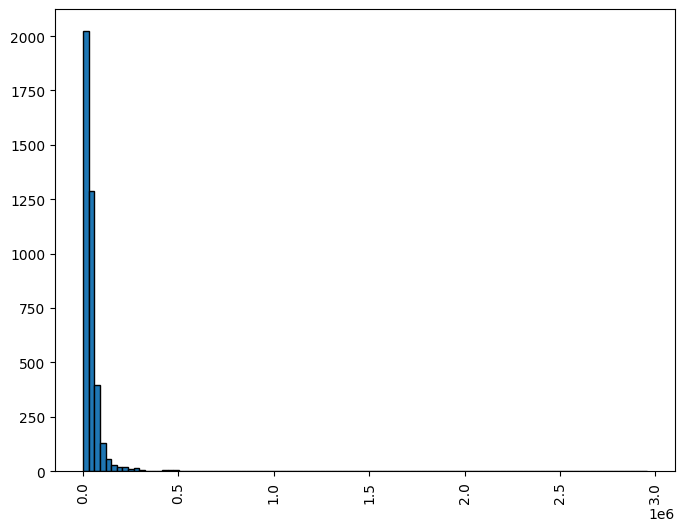

In [135]:
plt.figure(figsize=(8,6))
plt.hist(df2['price'], bins=100, edgecolor='black')
plt.xticks(rotation=90)
plt.show()

In [147]:
df.nlargest(60, 'price')

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
693,Maserati,Quattroporte Base,2005,"32,000 mi.",Gasoline,394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Red,Beige,At least 1 accident or damage reported,Yes,2954083
229,Bugatti,Veyron 16.4 Grand Sport,2011,"6,330 mi.",Gasoline,8.0L W16 64V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,White,White,None reported,Yes,1950995
3046,Porsche,Carrera GT Base,2005,"4,400 mi.",Gasoline,605.0HP 5.7L 10 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,None reported,Yes,1599000
1356,Lamborghini,Aventador SVJ Base,2021,"6,987 mi.",Gasoline,6.5L V12 48V MPFI DOHC,7-Speed,–,Nero Ade,None reported,Yes,749950
624,Rolls-Royce,Cullinan,2022,398 mi.,Gasoline,6.7L V12 48V GDI DOHC Twin Turbo,8-Speed Automatic,Silver,Charles Blue,None reported,Yes,695000
979,Lamborghini,Aventador SVJ Base,2019,"6,929 mi.",Gasoline,759.0HP 6.5L 12 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,649999
1615,Rolls-Royce,Phantom,2023,"1,560 mi.",–,–,–,Tempest,Cobalt Blue,None reported,Yes,599995
1508,Rolls-Royce,Phantom,2018,"7,585 mi.",Gasoline,6.8L V12 48V GDI DOHC Twin Turbo,8-Speed Automatic,–,–,None reported,Yes,599000
3655,Lamborghini,Aventador S Base,2018,"5,858 mi.",Gasoline,729.0HP 6.5L 12 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Gray,None reported,Yes,491836
1061,Dodge,Viper GTC,2017,"1,389 mi.",Gasoline,645.0HP 8.4L 10 Cylinder Engine Gasoline Fuel,M/T,Black,Black,None reported,Yes,489995


In [143]:
df.sort_values(by=['price'], reversed=True).head(20)

TypeError: DataFrame.sort_values() got an unexpected keyword argument 'reversed'